In [ ]:
import pyforest


In [5]:
!pip install kaleido

In [4]:
df=pd.read_csv(r'D:\MTech\My_Projects\Bangalore_Traffic_Dataset\Banglore_traffic_Dataset.csv')

<IPython.core.display.Javascript object>

### Inspecting the Data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance           8936 no

In [27]:
df.describe().transpose()

count          mean           std          min  \
Traffic Volume                8936.0  29236.048120  13001.808801  4233.000000   
Average Speed                 8936.0     39.447427     10.707244    20.000000   
Travel Time Index             8936.0      1.375554      0.165319     1.000039   
Congestion Level              8936.0     80.818041     23.533182     5.160279   
Road Capacity Utilization     8936.0     92.029215     16.583341    18.739771   
Incident Reports              8936.0      1.570389      1.420047     0.000000   
Environmental Impact          8936.0    108.472096     26.003618    58.466000   
Public Transport Usage        8936.0     45.086651     20.208460    10.006853   
Traffic Signal Compliance     8936.0     79.950243     11.585006    60.003933   
Parking Usage                 8936.0     75.155597     14.409394    50.020411   
Pedestrian and Cyclist Count  8936.0    114.533348     36.812573    66.000000   

                                       25%           50%           75%  \
Traffic Volume                19413.000000  27600.000000  38058.500000   
Average Speed                    31.775825     39.199368     46.644517   
Travel Time Index                 1.242459      1.500000      1.500000   
Congestion Level                 64.292905     92.389018    100.000000   
Road Capacity Utilization        97.354990    100.000000    100.000000   
Incident Reports                  0.000000      1.000000      2.000000   
Environmental Impact             88.826000    105.200000    126.117000   
Public Transport Usage           27.341191     45.170684     62.426485   
Traffic Signal Compliance        69.828270     79.992773     89.957358   
Parking Usage                    62.545895     75.317610     87.518589   
Pedestrian and Cyclist Count     94.000000    102.000000    111.000000   

                                       max  
Traffic Volume                72039.000000  
Average Speed                    89.790843  
Travel Time Index                 1.500000  
Congestion Level                100.000000  
Road Capacity Utilization       100.000000  
Incident Reports                 10.000000  
Environmental Impact            194.078000  
Public Transport Usage           79.979744  
Traffic Signal Compliance        99.993652  
Parking Usage                    99.995049  
Pedestrian and Cyclist Count    243.000000

##### Traffic Data Column Profiling:
Traffic Volume = Count of vehicles crossing a specific point in a time interval.(Here in hours)

Average Speed refers to the mean velocity of all vehicles passing a given road segment or intersection during a specific time period (usually 1 hour).

The Travel Time Index (TTI) is a widely used traffic congestion indicator that compares the actual travel time experienced by drivers to the time it would take under ideal (free-flow) conditions.If it is 1.0 then no congestion(free-flow speed), 1.2 then 20% longer then free-flow, 1.5 then 50% longer than free flow or heavy congestion, 2.0 means twice, severe congestion.

Congestion Level is a measure of how crowded or slow traffic is on a road segment at a given time.(in percentage)

Road Capacity Utilization measures how fully a road is being used relative to its maximum designed capacity—that is, how close traffic volume is to what the road can handle efficiently.

Incident Reports refer to recorded events that disrupt normal traffic flow. These can include accidents, vehicle breakdowns, construction work, or any unexpected events on or near the road that may cause congestion, delays, or diversions.

Environmental Impact refers to how traffic conditions affect the environment.

Public Transport Usage refers to the number of people using buses, metros, or other public transit systems

Traffic Signal Compliance refers to how well drivers obey traffic signals—especially red lights—at intersections. It indicates driver behavior, traffic discipline, and intersection safety.

Parking Usage refers to how much of the available parking space is occupied at a given time and location. It reflects demand for parking and helps analyze traffic congestion, especially in commercial or dense areas like central Bengaluru.

Pedestrian and Cyclist Count refers to the number of people walking or cycling through a particular location during a specific time interval. It helps analyze non-motorized traffic flow, safety, infrastructure usage, and urban mobility trends.

In [28]:
df.columns

Index(['Date', 'Area Name', 'Road/Intersection Name', 'Traffic Volume',
       'Average Speed', 'Travel Time Index', 'Congestion Level',
       'Road Capacity Utilization', 'Incident Reports', 'Environmental Impact',
       'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage',
       'Pedestrian and Cyclist Count', 'Weather Conditions',
       'Roadwork and Construction Activity'],
      dtype='object')

In [29]:
df.head()

Date    Area Name Road/Intersection Name  Traffic Volume  \
0  2022-01-01  Indiranagar          100 Feet Road           50590   
1  2022-01-01  Indiranagar               CMH Road           30825   
2  2022-01-01   Whitefield    Marathahalli Bridge            7399   
3  2022-01-01  Koramangala    Sony World Junction           60874   
4  2022-01-01  Koramangala          Sarjapur Road           57292   

   Average Speed  Travel Time Index  Congestion Level  \
0      50.230299           1.500000        100.000000   
1      29.377125           1.500000        100.000000   
2      54.474398           1.039069         28.347994   
3      43.817610           1.500000        100.000000   
4      41.116763           1.500000        100.000000   

   Road Capacity Utilization  Incident Reports  Environmental Impact  \
0                 100.000000                 0               151.180   
1                 100.000000                 1               111.650   
2                  36.396525                 0                64.798   
3                 100.000000                 1               171.748   
4                 100.000000                 3               164.584   

   Public Transport Usage  Traffic Signal Compliance  Parking Usage  \
0               70.632330                  84.044600      85.403629   
1               41.924899                  91.407038      59.983689   
2               44.662384                  61.375541      95.466020   
3               32.773123                  75.547092      63.567452   
4               35.092601                  64.634762      93.155171   

   Pedestrian and Cyclist Count Weather Conditions  \
0                           111              Clear   
1                           100              Clear   
2                           189              Clear   
3                           111              Clear   
4                           104              Clear   

  Roadwork and Construction Activity  
0                                 No  
1                                 No  
2                                 No  
3                                 No  
4                                 No

In [30]:
df.tail()

Date        Area Name Road/Intersection Name  Traffic Volume  \
8931  2024-08-09  Electronic City             Hosur Road           11387   
8932  2024-08-09        M.G. Road         Trinity Circle           36477   
8933  2024-08-09        M.G. Road     Anil Kumble Circle           42822   
8934  2024-08-09        Jayanagar       South End Circle           20540   
8935  2024-08-09     Yeshwanthpur    Yeshwanthpur Circle           14705   

      Average Speed  Travel Time Index  Congestion Level  \
8931      23.440276           1.262384         35.871483   
8932      45.168429           1.500000        100.000000   
8933      22.028609           1.500000        100.000000   
8934      52.254798           1.020520         72.639152   
8935      31.128967           1.048720         43.409821   

      Road Capacity Utilization  Incident Reports  Environmental Impact  \
8931                  57.354487                 1                72.774   
8932                 100.000000                 3               122.954   
8933                 100.000000                 1               135.644   
8934                  97.845527                 2                91.080   
8935                  77.734621                 1                79.410   

      Public Transport Usage  Traffic Signal Compliance  Parking Usage  \
8931               21.523289                  83.530352      97.898279   
8932               29.822312                  60.738488      60.355967   
8933               43.185905                  85.321627      61.333731   
8934               44.416043                  89.586947      79.197198   
8935               26.616725                  80.778753      60.602672   

      Pedestrian and Cyclist Count Weather Conditions  \
8931                           211                Fog   
8932                            95              Clear   
8933                           110              Clear   
8934                            94              Clear   
8935                           201               Rain   

     Roadwork and Construction Activity  
8931                                 No  
8932                                 No  
8933                                 No  
8934                                 No  
8935                                 No

In [31]:
df.shape

(8936, 16)

### Cleaning the Data

In [32]:
df.isnull().sum()

Date                                  0
Area Name                             0
Road/Intersection Name                0
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     0
Congestion Level                      0
Road Capacity Utilization             0
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Traffic Signal Compliance             0
Parking Usage                         0
Pedestrian and Cyclist Count          0
Weather Conditions                    0
Roadwork and Construction Activity    0
dtype: int64

In [33]:
df.duplicated().sum()

0

Since there are no null values and no duplicates in the dataset, I will proceed with Exploratory Data Analysis (EDA).

### Exploratory Data Analysis (EDA)

In [7]:
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots


pio.renderers.default = "jupyterlab+png"

#select numeric columns
numeric_cols=df.select_dtypes(include='number').columns

#setup the grid
num_of_cols=len(numeric_cols)
cols_per_row=3
num_of_rows=math.ceil(num_of_cols/cols_per_row)
num_of_rows

# Setup subplot figure
fig = make_subplots(rows=num_of_rows, cols=cols_per_row, 
                    subplot_titles=numeric_cols)


for idx, col in enumerate(numeric_cols):
    row = idx // cols_per_row + 1
    col_pos = idx % cols_per_row + 1

    fig.add_trace(
        go.Histogram(x=df[col], name=col, nbinsx=20, marker_color='indianred'),
        row=row, col=col_pos
    )

# Update layout
fig.update_layout(
    height=300 * num_of_rows,
    width=1000,
    title_text="Histograms of Numerical Features",
    showlegend=True
)

fig.show()

NameError: name 'pio' is not defined

#### Box Plot Analysis: Detecting Anomalies in Numeric Features

In [35]:
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Setup the grid
cols_per_row = 3
num_of_cols = len(numeric_cols)
num_of_rows = math.ceil(num_of_cols / cols_per_row)

# Setup subplot figure
fig = make_subplots(rows=num_of_rows, cols=cols_per_row, 
                    subplot_titles=numeric_cols)

# Add a boxplot for each numeric column
for idx, col in enumerate(numeric_cols):
    row = idx // cols_per_row + 1
    col_pos = idx % cols_per_row + 1

    fig.add_trace(
        go.Box(y=df[col], name=col, marker_color='royalblue'),
        row=row, col=col_pos
    )

# Update layout
fig.update_layout(
    height=300 * num_of_rows,
    width=1000,
    title_text="Boxplots of Numerical Features",
    showlegend=False
)

fig.show()


#### Correlation Matrix: Identifying Relationships Between Numeric Features

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

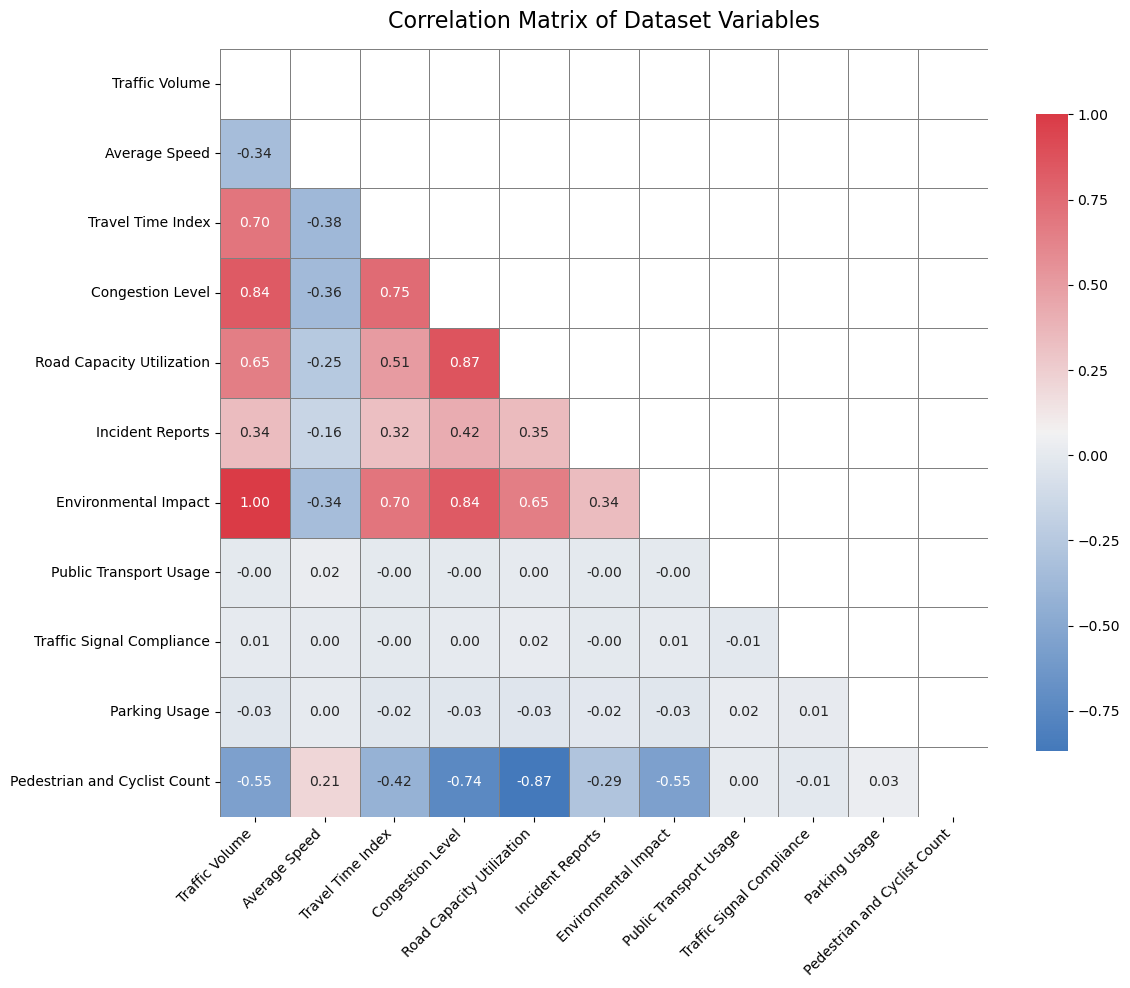

In [36]:
# Compute correlation
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

# Mask the upper triangle (optional, to reduce redundancy)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the color palette
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr,mask=mask, cmap=cmap, annot=True, fmt=".2f",
            linewidths=0.6, linecolor='gray', square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix of Dataset Variables", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

#### The distribution of total traffic volume among different junctions across areas.

In [37]:
heatmap_data = df.pivot_table(values='Traffic Volume', index='Area Name', columns='Road/Intersection Name', aggfunc='sum')
heatmap_data
fig = px.imshow(
    heatmap_data,
    labels=dict(x="Road/Intersection Name", y="Area Name", color="Traffic Volume"),
    title="Heatmap of Traffic Volume Across Areas and Roads",
    text_auto=False,
    width=1000,  
    height=600,

)
fig.show()


In [38]:
df.groupby(['Area Name','Road/Intersection Name'])['Traffic Volume'].agg('sum').sort_values(ascending=False)

Area Name        Road/Intersection Name
Koramangala      Sony World Junction       28366028
Indiranagar      CMH Road                  28046255
                 100 Feet Road             27482893
Koramangala      Sarjapur Road             27329166
M.G. Road        Anil Kumble Circle        26756138
                 Trinity Circle            26229802
Jayanagar        South End Circle          14649543
                 Jayanagar 4th Block       14207817
Hebbal           Hebbal Flyover            12700794
                 Ballari Road              12505777
Whitefield       Marathahalli Bridge       10220293
                 ITPL Main Road             9839717
Yeshwanthpur     Yeshwanthpur Circle        7190364
                 Tumkur Road                6705391
Electronic City  Hosur Road                 4586351
                 Silk Board Junction        4436997
Name: Traffic Volume, dtype: int64

In [39]:
df.groupby(['Area Name','Road/Intersection Name'])['Traffic Volume'].agg('mean').round(2).sort_values(ascending=False)

Area Name        Road/Intersection Name
Koramangala      Sony World Junction       41470.80
                 Sarjapur Road             40189.95
M.G. Road        Trinity Circle            35350.14
                 Anil Kumble Circle        35251.83
Indiranagar      CMH Road                  32611.92
                 100 Feet Road             31956.85
Hebbal           Hebbal Flyover            26794.92
                 Ballari Road              26272.64
Jayanagar        South End Circle          24704.12
                 Jayanagar 4th Block       24496.24
Whitefield       ITPL Main Road            21866.04
                 Marathahalli Bridge       20772.95
Yeshwanthpur     Yeshwanthpur Circle       19277.12
                 Tumkur Road               18574.49
Electronic City  Hosur Road                16557.22
                 Silk Board Junction       16134.53
Name: Traffic Volume, dtype: float64

#### Traffic Volume Distribution by Area and Junction in percentage

In [40]:
import plotly.express as px

# Step 1: Calculate average traffic volume
avg_volume = df.groupby(['Area Name', 'Road/Intersection Name'])['Traffic Volume'].mean().reset_index()

# Step 2: Sunburst chart with percentage inside each area
fig = px.sunburst(
    avg_volume,
    path=['Area Name', 'Road/Intersection Name'],   # Hierarchical levels
    values='Traffic Volume',                        # Size of each slice
    color='Traffic Volume',                         # Optional: use color to represent volume
    color_continuous_scale='RdYlGn_r',              # Color scale: green (low) to red (high)
    title='Average Traffic Volume by Area and Junction',
    width=1200,
    height=800
    
)

# Step 3: Update hover to show percentage share
fig.update_traces(insidetextorientation='radial', textinfo='label+percent entry')

fig.show()


#### Assessing the Environmental Impact of Traffic Volume

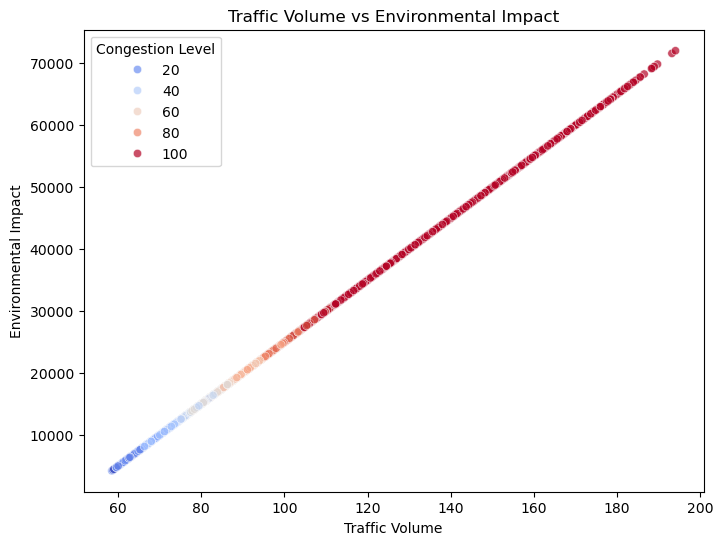

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Environmental Impact', y='Traffic Volume', hue='Congestion Level', palette='coolwarm', alpha=0.7)
plt.title('Traffic Volume vs Environmental Impact')
plt.ylabel('Environmental Impact')
plt.xlabel('Traffic Volume')
plt.show()


As traffic volume increases across key Bengaluru intersections, environmental stress also rises significantly. High vehicle density leads to:

Increased air pollution: More vehicles emit higher levels of pollutants such as PM2.5, NO₂, and CO₂.

Elevated PM2.5 levels: Traffic-heavy areas consistently show higher concentrations of fine particulate matter, especially during peak hours.

Fuel inefficiency and GHG emissions: Stop-and-go traffic leads to more fuel combustion, contributing to greenhouse gases.

Noise pollution: Heavily congested junctions see a spike in noise levels, impacting human health.

Heat generation: Dense traffic and reduced greenery contribute to urban heat islands, raising local temperatures.


#### Variation in Traffic Volume Across Weekdays and Weekends

In [42]:
# Ensure your column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column for day of the week (0=Monday, 6=Sunday)
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Label as Weekday or Weekend
df['WeekType'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


<IPython.core.display.Javascript object>

In [43]:
#cross check the dates
df[['Date', 'DayOfWeek', 'WeekType']].sample(10)


Date  DayOfWeek WeekType
994  2022-04-16          5  Weekend
6470 2023-11-23          3  Weekday
317  2022-02-04          4  Weekday
7442 2024-03-02          5  Weekend
2956 2022-11-09          2  Weekday
8647 2024-07-11          3  Weekday
3312 2022-12-18          6  Weekend
7361 2024-02-23          4  Weekday
3842 2023-02-15          2  Weekday
5383 2023-08-01          1  Weekday

In [44]:
# Get average and total traffic volume by WeekType
traffic_comparison = df.groupby('WeekType')['Traffic Volume'].agg(['mean', 'sum', 'count']).round(2).reset_index()
print(traffic_comparison)


  WeekType      mean        sum  count
0  Weekday  29297.17  186740164   6374
1  Weekend  29083.98   74513162   2562


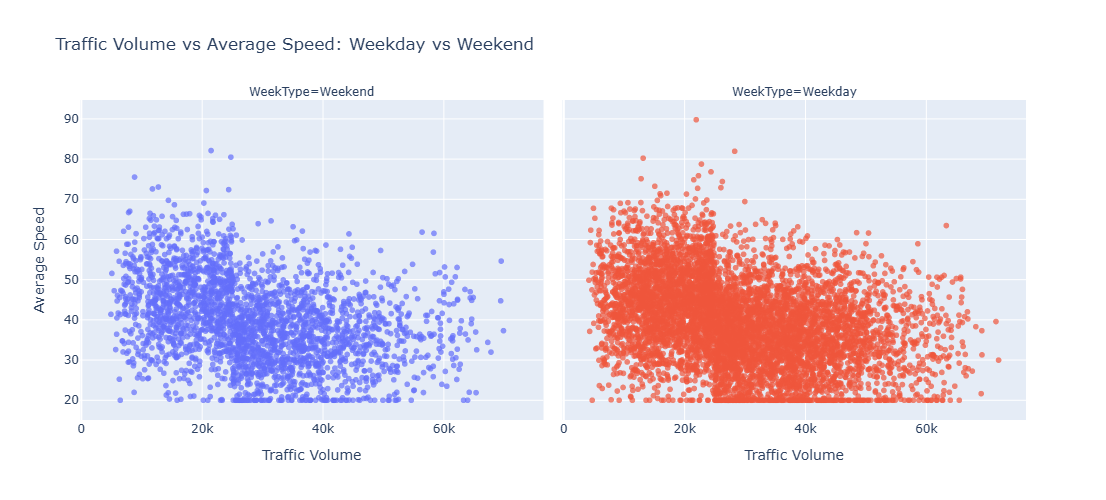

In [45]:
import plotly.express as px

fig = px.scatter(
    df,
    x='Traffic Volume',
    y='Average Speed',
    color='WeekType',
    facet_col='WeekType',
    title='Traffic Volume vs Average Speed: Weekday vs Weekend',
    opacity=0.7,
    height=500,
    width=1000
)

fig.update_layout(showlegend=False)
fig.show()


Our scatter plot analysis comparing "Traffic Volume vs. Average Speed: Weekday vs Weekend" clearly illustrates that weekdays are significantly more crowded and congested than weekends. The weekday plot (red dots) shows a much denser concentration of data points, particularly at higher Traffic Volumes leading to consistently lower Average Speeds. This stark contrast with the weekend plot (blue dots), which displays generally lower traffic volumes and less severe speed reductions, provides a strong basis for strategic planning.

Therefore, a key recommendation for scheduling disruptive urban infrastructure projects, such as flyover construction or major road repair work, is to prioritize and conduct these activities predominantly during weekend periods.

#### Traffic Volume Under Varying Weather Conditions

In [46]:
df['Weather Conditions'].unique()

array(['Clear', 'Overcast', 'Fog', 'Rain', 'Windy'], dtype=object)

In [47]:
import plotly.express as px

# Ensure the column is clean
df['Weather Conditions'] = df['Weather Conditions'].astype(str).str.strip().str.title()

# Group by weather condition
df_grouped = df.groupby('Weather Conditions', as_index=False)['Traffic Volume'].sum()

# Create the chart
fig = px.bar(
    df_grouped.sort_values('Traffic Volume'),
    x='Weather Conditions',
    y='Traffic Volume',
    color='Weather Conditions',
    color_discrete_sequence=px.colors.qualitative.Prism,
    title='Traffic Volume by Weather Conditions',
    height=600,
    width=1000
)

# Layout styling
fig.update_layout(
    title_font=dict(size=24, family='Arial', color='black'),
    xaxis=dict(
        title='Weather Conditions',
        titlefont=dict(size=18),
        tickfont=dict(size=14),
        showgrid=True,
        gridcolor='#e0e0e0',
        linecolor='black',
        linewidth=1
    ),
    yaxis=dict(
        title='Traffic Volume',
        titlefont=dict(size=18),
        tickfont=dict(size=14),
        showgrid=True,
        gridcolor='#ffe0e0',
        linecolor='black',
        linewidth=1
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=60, r=40, t=80, b=60),
    showlegend=False
)

# Add border to bars
fig.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    opacity=0.9
)

fig.show()




Analysis of Traffic Volume by Weather Conditions

The bar chart illustrates the significant impact of various weather conditions on traffic volume.

Key Findings:

Dominance of Clear Weather: Clear weather consistently registers the highest traffic volume, significantly outstripping all other conditions. Its volume is approximately four times greater than the next highest category (overcast conditions).

Reduced Traffic in Other Conditions: Traffic volume substantially decreases under overcast, fog, rain, and windy conditions. Among these, windy weather consistently shows the lowest traffic volume.

Conclusion:

This analysis strongly suggests a direct correlation between clear weather and high traffic density, indicating that favorable weather is a primary factor influencing road usage and congestion.

#### Analyzing the Relationship Between Construction Activity and Traffic Congestion

In [48]:
df['Roadwork and Construction Activity'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
df.groupby('Roadwork and Construction Activity')[['Traffic Volume', 'Travel Time Index']].mean().reset_index()


Roadwork and Construction Activity  Traffic Volume  Travel Time Index
0                                 No    29194.610504           1.375513
1                                Yes    29614.436508           1.375922

In [50]:
no_work = df[df['Roadwork and Construction Activity'] == 'No']
yes_work = df[df['Roadwork and Construction Activity'] == 'Yes']

tti_increase = ((yes_work['Travel Time Index'].mean() - no_work['Travel Time Index'].mean()) /
                 no_work['Travel Time Index'].mean()) * 100

volume_increase = ((yes_work['Traffic Volume'].mean() - no_work['Traffic Volume'].mean()) /
                    no_work['Traffic Volume'].mean()) * 100

print(f"TTI increases by {tti_increase:.2f}% due to roadwork.")
print(f"Traffic Volume increases by {volume_increase:.2f}% due to roadwork.")


TTI increases by 0.03% due to roadwork.
Traffic Volume increases by 1.44% due to roadwork.


In [51]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Without Roadwork', x=['Traffic Volume', 'Travel Time Index'],
           y=[no_work['Traffic Volume'].mean(), no_work['Travel Time Index'].mean()]),
    go.Bar(name='With Roadwork', x=['Traffic Volume', 'Travel Time Index'],
           y=[yes_work['Traffic Volume'].mean(), yes_work['Travel Time Index'].mean()])
])

fig.update_layout(
    barmode='group',
    title='Impact of Roadwork on Congestion Levels',
    yaxis_title='Average Value',
    plot_bgcolor='white'
)

fig.show()


The analysis shows that the Travel Time Index (TTI) increases by only 0.03% in the presence of roadwork or construction activity. This minimal rise suggests that roadwork has a negligible impact on overall congestion levels in the observed areas. Therefore, other factors like traffic volume, weather, or time of day likely play a more significant role in affecting travel delays.

### Statistical Summary and Inference from Traffic Dataset

##### Does traffic volume differ significantly between weekdays and weekends?

In [52]:
#convert into date time from object
df['Date']=pd.to_datetime(df['Date'])

df['Day_of_week']=df['Date'].dt.dayofweek

df['WeekType']=df['Day_of_week'].apply(lambda x: 'weekend' if x>=5 else 'weekday')

<IPython.core.display.Javascript object>

In [53]:
weekday_volume=df[df['WeekType'] == 'weekday']['Traffic Volume']
weekend_volume=df[df['WeekType'] == 'weekend']['Traffic Volume']


Traffic Volume is a continuous (numeric) variable.

Day Type (Weekday vs Weekend) is a categorical variable with two independent groups.

Each observation belongs exclusively to one group (i.e., no overlap between weekday and weekend data).

Therefore, an independent t-test was used to compare the mean traffic volume across these two groups and assess whether the observed differences are statistically significant.

In [54]:
from scipy.stats import ttest_ind
t_stat,p_value=ttest_ind(weekday_volume,weekend_volume,equal_var=False)

print(f"T-statistics : {t_stat:.2f}")
print(f"P-Value: {p_value:.2f}")

T-statistics : 0.70
P-Value: 0.48


###### Assumption
H0: There is no difference in traffic volumes between weekdays and weekends.

H1: There is a difference in traffic volumes  between weekdays and weekends.

Result:
The p-value = 0.48 is greater than the significance level (0.05), so we fail to reject the null hypothesis (H0).

Conclusion:
There is no statistically significant difference in traffic volumes between weekdays and weekends.

##### Does increased parking usage have a significant impact on congestion levels

To evaluate the relationship between parking usage (independent numeric variable) and congestion level (dependent numeric variable, measured by the Travel Time Index), we employed the Pearson correlation test. This method is appropriate for assessing the strength and direction of a linear association between two continuous variables.

In [55]:
from scipy.stats import pearsonr

corr,p_value=pearsonr(df['Parking Usage'],df['Travel Time Index'])

print(f"The correlation :{corr:.2f}")
print(f"P-Value :{p_value:.2f}")

The correlation :-0.02
P-Value :0.03


###### Assumption:

H0: Parking usage has no significant impact on congestion levels.

H1: Parking usage has a significant impact on congestion levels.

Since the p-value = 0.03 is less than the significance level (0.05), we reject the null hypothesis (H₀).

Conclusion:
There is a statistically significant relationship between parking usage and congestion levels, indicating that parking usage has a significant impact on congestion.



##### Is there a significant relationship between weather conditions and the frequency of incident reports

One-Way ANOVA is the appropriate test in this case because the independent variable (weather conditions) is categorical with more than two levels, and the dependent variable (incident reports) is numeric.
The goal is to determine whether the mean number of incident reports differs significantly across various weather conditions.

In [56]:
weather_conditions=df.groupby('Weather Conditions')['Incident Reports'].agg('mean').sort_values(ascending=False)

In [57]:
weather_conditions

Weather Conditions
Fog         1.617310
Windy       1.593458
Overcast    1.577160
Clear       1.561555
Rain        1.551391
Name: Incident Reports, dtype: float64

In [58]:
from scipy.stats import f_oneway
groups = [group['Incident Reports'].values 
          for name, group in df.groupby('Weather Conditions')]

f_stat,p_value=f_oneway(*groups)

print(f_stat)
print(p_value)

0.3867433727672072
0.8182823936319665


###### Assumption

H0: There is no significant difference in the average number of incident reports across different weather conditions.

H1:There is significant difference in the average number of incident reports across different weather conditions.

Since your p-value = 0.818 is greater than 0.05, we fail to reject the null hypothesis.

There is no statistically significant difference in the mean number of incident reports across the different weather conditions.
In other words, weather conditions do not significantly influence the frequency of incident reports — based on this dataset.

In [59]:
df.groupby('Weather Conditions')['Incident Reports'].sum().sort_values(ascending=False)


Weather Conditions
Clear       8473
Overcast    2044
Fog         1551
Rain        1283
Windy        682
Name: Incident Reports, dtype: int64

Incident reports accoding to weather conditions

In [60]:
incident_counts = df.groupby('Weather Conditions')['Incident Reports'].sum()
weather_counts = df['Weather Conditions'].value_counts()

incident_rate = (incident_counts / weather_counts) * 1000 # per 1000 records
incident_rate.sort_values(ascending=False)


Weather Conditions
Fog         1617.309698
Windy       1593.457944
Overcast    1577.160494
Clear       1561.555474
Rain        1551.390568
dtype: float64

##### Does traffic volume have a significant impact on environmental impact?


In [61]:
corr,p_value=pearsonr(df['Traffic Volume'],df['Environmental Impact'])

print(f"The correlation value: {corr:.2f}")
print(f"The P-value: {p_value:.2f}")

The correlation value: 1.00
The P-value: 0.00


###### Assumption:

H0: There is no correlation between traffic volume and environmental impact.

H1:There is a significant correlation between traffic volume and environmental impact.

The Pearson correlation coefficient is 1.00, indicating a perfect positive linear relationship between traffic volume and environmental impact.

The p-value is 0.00, which is less than 0.05, so we reject the null hypothesis.

Conclusion: There is a statistically significant and perfect positive correlation between traffic volume and environmental impact — as traffic volume increases, environmental impact increases proportionally

##### Does public transport usage have a significant impact on traffic volume?

In [62]:
corr, p_value = pearsonr(df['Public Transport Usage'], df['Traffic Volume'])
print(f"The correlation value: {corr:.2f}")
print(f"The P-value: {p_value:.2f}")

The correlation value: -0.00
The P-value: 0.91


###### Assumption:
H0: Public transport uasge has no impact on traffic volume.

H1: Public transport usage significantly affects traffic volume

Since the p-value is 0.91, which is much greater than 0.05, we fail to reject the null hypothesis.

In [67]:
pwd

'C:\\Users\\Admin\\M_TECH\\My_Projects'